## Escolha do melhor algoritmo de Machine Learning

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import os
from sklearn.svm import SVC
import seaborn as sns

### Leitura de Dados

In [2]:
# Caminho para o diretório central
diretorio_central = 'SisFall/SisFall_dataset'

# Lista para armazenar os dataframes
dataframes = []

# Percorre todos os arquivos no diretório central e subdiretórios
for root, dirs, files in os.walk(diretorio_central):
    for file in files:
        if file.endswith('.txt'): # Verifica arquivos .txt
            caminho_arquivo = os.path.join(root, file)
            # Usa vírgula como delimitador de dados e ponto e vírgula como delimitador de linha
            df = pd.read_csv(caminho_arquivo, sep=',', lineterminator=';', header=None, encoding="ISO-8859-1")
            
            # Adiciona a coluna de rótulo com base no nome do arquivo
            if file.startswith('D'):
                df['queda'] = 0
            elif file.startswith('F'):
                df['queda'] = 1
            
            dataframes.append(df)

# Concatena todos os dataframes em um único dataframe
dataset = pd.concat(dataframes, ignore_index=True)
dataset = dataset.replace('\r\n', '', regex=True)


In [3]:
print(dataset.head()) 
print(dataset.tail())
print(dataset.shape)
print(dataset.columns)

      0     1      2     3     4    5     6     7       8  queda
0     9 -18.0  240.0 -12.0  74.0 -2.0  45.0 -77.0  1042.0      0
1     9 -23.0  241.0 -14.0  73.0 -1.0  45.0 -80.0  1044.0      0
2     9 -19.0  241.0 -13.0  73.0 -2.0  45.0 -78.0  1046.0      0
3     8 -20.0  243.0 -15.0  71.0 -2.0  47.0 -78.0  1047.0      0
4     8 -22.0  241.0 -14.0  69.0 -2.0  44.0 -83.0  1048.0      0
             0     1      2     3     4    5      6      7      8  queda
15863429   -53  77.0 -266.0 -44.0  17.0 -2.0 -231.0  305.0 -945.0      1
15863430   -53  79.0 -269.0 -44.0  18.0 -3.0 -233.0  310.0 -944.0      1
15863431   -53  75.0 -269.0 -44.0  20.0 -3.0 -236.0  309.0 -944.0      1
15863432   -54  76.0 -269.0 -45.0  19.0 -3.0 -231.0  309.0 -952.0      1
15863433         NaN    NaN   NaN   NaN  NaN    NaN    NaN    NaN      1
(15863434, 10)
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 'queda'], dtype='object')


### Pré-processamento de Dados

In [4]:
# Remover as colunas 6, 7 e 8 do dataset
dataset.drop([6, 7, 8], axis=1, inplace=True)

# Renomeia as colunas de 0 a 6
dataset.columns = ['acc_x', 'acc_y', 'acc_z', 'gir_x', 'gir_y', 'gir_z', 'queda']

#Remover linhas que contem valor NaN
dataset.dropna(inplace=True)

# Salva o dataset em um arquivo csv
dataset.to_csv('dataset.csv', index=False)


In [5]:
print(dataset.head(50))
print(dataset.tail())
print(dataset.shape)
print(dataset.columns)

   acc_x  acc_y  acc_z  gir_x  gir_y  gir_z  queda
0      9  -18.0  240.0  -12.0   74.0   -2.0      0
1      9  -23.0  241.0  -14.0   73.0   -1.0      0
2      9  -19.0  241.0  -13.0   73.0   -2.0      0
3      8  -20.0  243.0  -15.0   71.0   -2.0      0
4      8  -22.0  241.0  -14.0   69.0   -2.0      0
5      7  -22.0  237.0  -14.0   69.0   -2.0      0
6      6  -21.0  243.0  -13.0   68.0   -2.0      0
7     11  -22.0  240.0  -12.0   65.0   -2.0      0
8      7  -21.0  243.0  -10.0   62.0   -2.0      0
9     11  -19.0  242.0   -9.0   59.0   -2.0      0
10     7  -23.0  245.0   -6.0   58.0   -2.0      0
11     8  -21.0  240.0   -5.0   56.0    0.0      0
12     8  -20.0  243.0   -4.0   57.0   -1.0      0
13    10  -23.0  236.0   -2.0   57.0    0.0      0
14     9  -21.0  243.0   -1.0   58.0   -1.0      0
15    14  -24.0  242.0    0.0   60.0    0.0      0
16     8  -20.0  243.0    1.0   62.0   -1.0      0
17     7  -18.0  242.0    2.0   63.0   -2.0      0
18     9  -18.0  238.0    2.0  

In [2]:
#Ler o novo dataset
dataset = pd.read_csv('dataset.csv')

In [3]:
# Analisando o balanceamento de classes no dataset
print(dataset['queda'].value_counts())


queda
0    10465215
1     5393714
Name: count, dtype: int64


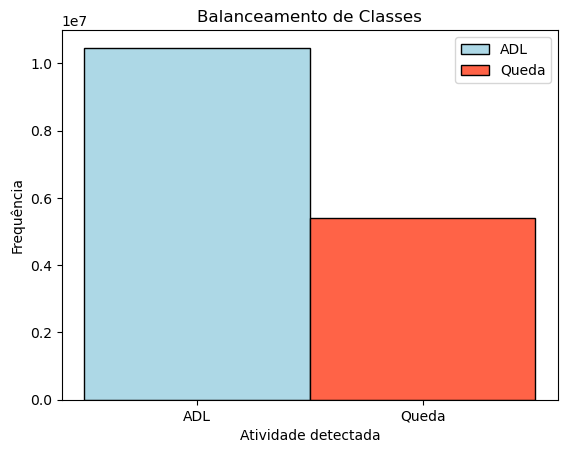

In [4]:
# Carregando o dataset
data = pd.read_csv('dataset.csv')

# Plotando o histograma para a classe 0 (ADL)
plt.hist(data[data['queda'] == 0]['queda'], bins=1, edgecolor='black', color='#ADD8E6', label='ADL')

# Plotando o histograma para a classe 1 (Queda)
plt.hist(data[data['queda'] == 1]['queda'], bins=1, edgecolor='black', color='#FF6347', label='Queda')

plt.title('Balanceamento de Classes')
plt.xlabel('Atividade detectada')
plt.ylabel('Frequência')
plt.xticks([0, 1], ['ADL', 'Queda'])
plt.legend()
plt.show()


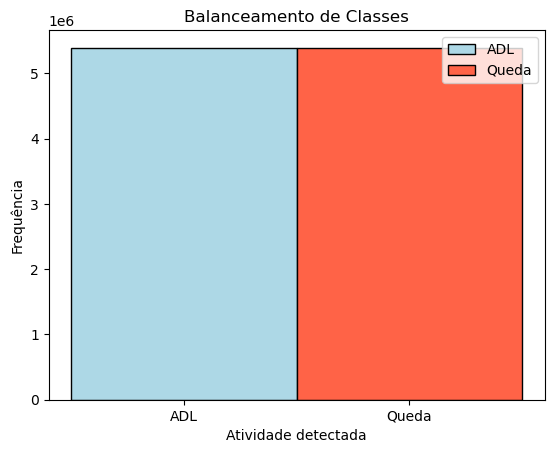

In [5]:
#Lidando com o balanceamento de classes
# Separando as classes
classe_0 = data[data['queda'] == 0]
classe_1 = data[data['queda'] == 1]

# Fazendo o undersampling da classe majoritária
classe_0_undersampled = classe_0.sample(len(classe_1))

# Concatenando as classes
data_undersampled = pd.concat([classe_0_undersampled, classe_1])

# Plotando o histograma para a classe 0 (ADL)
plt.hist(data_undersampled[data_undersampled['queda'] == 0]['queda'], bins=1, edgecolor='black', color='#ADD8E6', label='ADL')

# Plotando o histograma para a classe 1 (Queda)
plt.hist(data_undersampled[data_undersampled['queda'] == 1]['queda'], bins=1, edgecolor='black', color='#FF6347', label='Queda')

plt.title('Balanceamento de Classes')
plt.xlabel('Atividade detectada')
plt.ylabel('Frequência')
plt.xticks([0, 1], ['ADL', 'Queda'])
plt.legend()
plt.show()


In [6]:
# Salvando o dataset balanceado
data_undersampled.to_csv('dataset_balanceado.csv', index=False)

In [3]:
# Analisando a correlação entre as variáveis e o target (queda)
data_undersampled = pd.read_csv('dataset_balanceado.csv')
correlacao = data_undersampled.corr()
print(correlacao)

          acc_x     acc_y     acc_z     gir_x     gir_y     gir_z     queda
acc_x  1.000000 -0.063752  0.006498 -0.002196  0.077383 -0.099395 -0.055200
acc_y -0.063752  1.000000  0.063940  0.122590 -0.002355 -0.009159  0.419386
acc_z  0.006498  0.063940  1.000000  0.087892  0.016434 -0.000594  0.074292
gir_x -0.002196  0.122590  0.087892  1.000000  0.006061 -0.009340 -0.011731
gir_y  0.077383 -0.002355  0.016434  0.006061  1.000000 -0.116831 -0.006652
gir_z -0.099395 -0.009159 -0.000594 -0.009340 -0.116831  1.000000  0.009806
queda -0.055200  0.419386  0.074292 -0.011731 -0.006652  0.009806  1.000000


In [9]:
# Separa os recursos (X) e o rótulo (y)
X = dataset.iloc[:, :-1] # Todos os dados, exceto o último (que é o rótulo)
y = dataset.iloc[:, -1]   # Última coluna como rótulo

X_scaled_df = pd.DataFrame(X, columns=X.columns)

accelerometer_x = X_scaled_df.iloc[:, 0]
accelerometer_y = X_scaled_df.iloc[:, 1]
accelerometer_z = X_scaled_df.iloc[:, 2]
giroscope_x = X_scaled_df.iloc[:, 3]
giroscope_y = X_scaled_df.iloc[:, 4]
giroscope_z = X_scaled_df.iloc[:, 5]

### Extração de Features

In [8]:
# Imprimir todas as colunas do DataFrame
print(dataset.columns.tolist())
print(accelerometer_y.head(10))

['acc_x', 'acc_y', 'acc_z', 'gir_x', 'gir_y', 'gir_z', 'queda']
0   -18.0
1   -23.0
2   -19.0
3   -20.0
4   -22.0
5   -22.0
6   -21.0
7   -22.0
8   -21.0
9   -19.0
Name: acc_y, dtype: float64


In [26]:
# Supondo que 'dataset' é seu DataFrame original
features_dataset = pd.DataFrame()

# Sum vector magnitude on horizontal plane c1=[k] = (sqrt(ax^2 [k] + az^2 [k])) (C1 feature)
features_dataset['sum_vector_magnitude'] = np.sqrt((dataset['acc_x'] ** 2) + (dataset['acc_z'] ** 2))


In [27]:
#Sum vector magnitude on horizontal plane c2=[k] = (sqrt(ax^2 [k] + ay^2 [k] + az^2 [k])) (C2 feature)
features_dataset['sum_vector_magnitude_horizontal'] = np.sqrt((dataset['acc_x'] ** 2) + (dataset['acc_y'] ** 2) + (dataset['acc_z'] ** 2))

In [28]:
# Standar deviation magnitude on horizontal plane (axial x and z) c3=[k] = std(ax [k], az [k]) (C8 feature)
features_dataset['std_magnitude_horizontal'] = np.std([dataset['acc_x'], dataset['acc_z']], axis=0)

In [29]:
# Standard deviation magnitude on the three axials c3=[k] = std(ax [k], ay [k], az [k]) (C9 feature)
features_dataset['std_magnitude'] = np.std([dataset['acc_x'], dataset['acc_y'], dataset['acc_z']], axis=0)

In [30]:
# Salva o dataset de features em um arquivo CSV
features_dataset.to_csv('features_dataset.csv', index=False)

In [31]:
#imprime sum vector magnitude
print(features_dataset['sum_vector_magnitude'])
print(features_dataset.shape)


0           240.168691
1           241.167991
2           241.167991
3           243.131652
4           241.132744
               ...    
15858924    274.972726
15858925    271.228686
15858926    274.171479
15858927    274.171479
15858928    274.366543
Name: sum_vector_magnitude, Length: 15858929, dtype: float64
(15858929, 4)


In [33]:
#Cria novo dataset que concatena as colunas acc_x, acc_y, acc_z, gir_x, gir_y, gir_z com sum_vector_magnitude, max_peak_to_peak, std_magnitude_horizontal e std_magnitude
dataset_com_feature = pd.concat([X, features_dataset], axis=1)
print(dataset_com_feature.head())

#Salva o dataset com as features em um arquivo csv
dataset_com_feature.to_csv('dataset_com_feature.csv', index=False)


   acc_x  acc_y  acc_z  gir_x  gir_y  gir_z  sum_vector_magnitude  \
0      9  -18.0  240.0  -12.0   74.0   -2.0            240.168691   
1      9  -23.0  241.0  -14.0   73.0   -1.0            241.167991   
2      9  -19.0  241.0  -13.0   73.0   -2.0            241.167991   
3      8  -20.0  243.0  -15.0   71.0   -2.0            243.131652   
4      8  -22.0  241.0  -14.0   69.0   -2.0            241.132744   

   sum_vector_magnitude_horizontal  std_magnitude_horizontal  std_magnitude  
0                       240.842272                     115.5     115.784282  
1                       242.262255                     116.0     117.635973  
2                       241.915274                     116.0     116.527536  
3                       243.952864                     117.5     117.935010  
4                       242.134260                     116.5     117.548099  
